## Import Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [11]:
df = pd.read_csv(r"C:\Users\Vikram Bhagnani\OneDrive\Desktop\cluster_input.csv")

## Convert categorical columns into numbers

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

## Scale the data

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

## Choose number of clusters using elbow method

C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

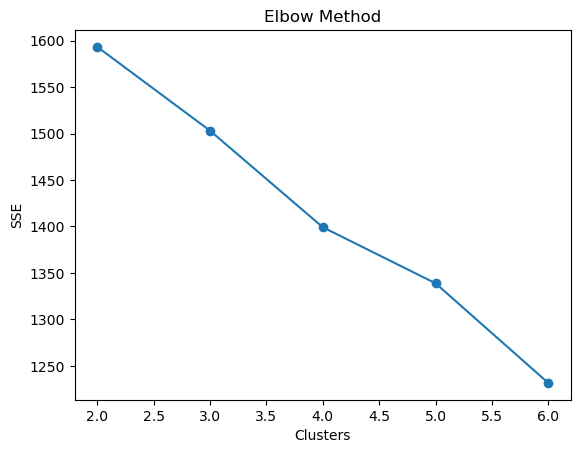

In [19]:
sse = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 7), sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


## Apply K-Means clustering

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vikram Bhagnani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Save cluster output

In [21]:
df.to_csv("cluster_output.csv", index=False)

In [22]:
df

,Customer_ID,Gender,Item_Purchased,Location,Size,Color,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Cluster
0,1,Male,Blouse,Kentucky,L,Gray,Yes,Credit Card,Express,Yes,Yes,Venmo,1
1,2,Male,Sweater,Maine,L,Maroon,Yes,Bank Transfer,Express,Yes,Yes,Cash,1
2,3,Male,Jeans,Massachusetts,S,Maroon,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,0
3,4,Male,Sandals,Rhode Island,M,Maroon,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,1
4,5,Male,Blouse,Oregon,M,Turquoise,Yes,Cash,Free Shipping,Yes,Yes,PayPal,1
5,6,Male,Sneakers,Wyoming,M,White,Yes,Venmo,Standard,Yes,Yes,Venmo,1
6,7,Male,Shirt,Montana,M,Gray,Yes,Debit Card,Free Shipping,Yes,Yes,Cash,1
7,8,Male,Shorts,Louisiana,L,Charcoal,Yes,Debit Card,Free Shipping,Yes,Yes,Credit Card,2
8,9,Male,Coat,West Virginia,L,Silver,Yes,Venmo,Express,Yes,Yes,Venmo,1
9,10,Male,Handbag,Missouri,M,Pink,Yes,PayPal,2-Day Shipping,Yes,Yes,Cash,1
